<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Moderate_Logistic_Regreession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic dataset using scikit-learn
# Dataset consists of 2000 samples with 10 features (8 informative and 2 redundant)
X, y = make_classification(n_samples=2000, n_features=10, n_informative=8, n_redundant=2, n_classes=2, random_state=42)

In [3]:
# Split dataset into training and testing sets
# 80% of data is used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Define the logistic regression model using TensorFlow
# Adding a hidden layer to make the model slightly more complex
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer with input shape equal to number of features
    tf.keras.layers.Dense(8, activation='relu'),  # Hidden layer with 8 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
# Compile the model
# Loss function: Binary Crossentropy, Optimizer: Adam, Metrics: Accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
# Epochs: 100, Batch size: 32
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4031 - loss: 0.8309 - val_accuracy: 0.4325 - val_loss: 0.7864
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4354 - loss: 0.7587 - val_accuracy: 0.5200 - val_loss: 0.7177
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5142 - loss: 0.6940 - val_accuracy: 0.5850 - val_loss: 0.6690
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 0.6606 - val_accuracy: 0.6250 - val_loss: 0.6304
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - loss: 0.6283 - val_accuracy: 0.6600 - val_loss: 0.6012
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.5917 - val_accuracy: 0.6750 - val_loss: 0.5772
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 0.5760 - val_accuracy: 0.6950 - val_loss: 0.5571
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.5489 - val_accuracy: 0.7125 - v

In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3372 
Test Loss: 0.3262
Test Accuracy: 0.8650


In [9]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold 0.5 for classifying as 0 or 1

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [10]:
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       200
           1       0.86      0.88      0.87       200

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400


Confusion Matrix:
[[171  29]
 [ 25 175]]


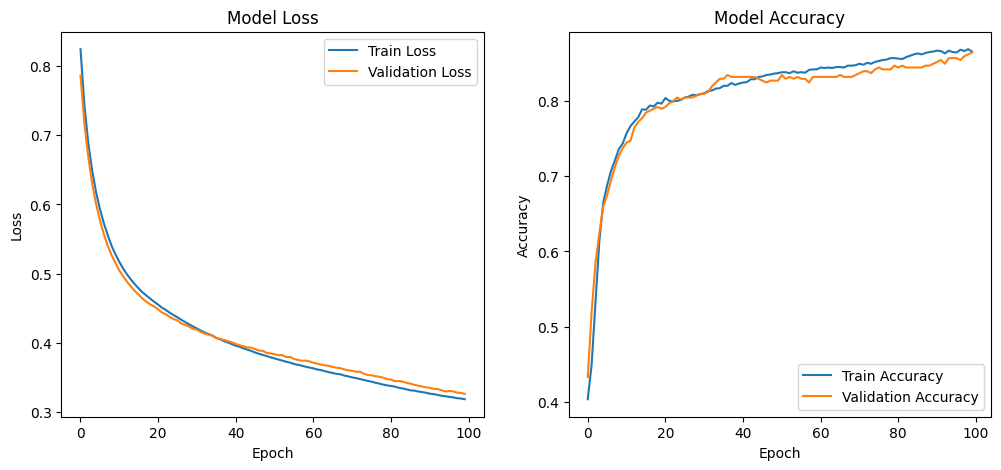

In [13]:
# Plot the training history (loss and accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training & validation loss values
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training & validation accuracy values
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [14]:
# Print first 10 predictions to verify
print("Predictions:", y_pred[:10].flatten())
print("True Labels:", y_test[:10])

Predictions: [0 0 0 1 1 0 0 1 1 0]
True Labels: [0 0 0 1 1 0 0 1 1 0]
